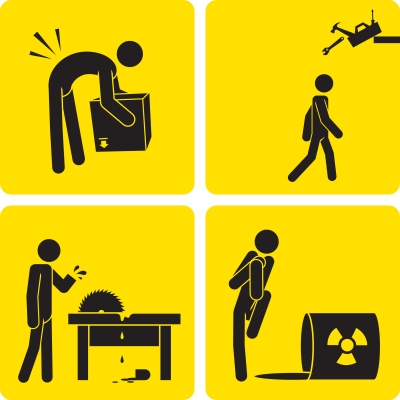

   # Nelaimingi atsitikimai darbe 2010-2021 m. 

**Nelaimingas atsitikimas (NA) darbe – tai įvykis darbe, įskaitant eismo įvykį darbo laiku, nustatyta tvarka ištirtas 
ir pripažintas nelaimingu atsitikimu darbe. Tokio įvykio darbe padariniais laikomos lengvos, sunkios ar mirtinos darbuotojo traumos.  Pranešimai apie nelaimingus atsitikimus darbe laikomi svarbiais informacijos šaltiniais, nuo jų tikslumo ir kokybės priklauso nelaimingų atsitikimų darbe apskaita ir prevencinių priemonių taikymas.**

### 1. Duomenų nuskaitymas ir paruošimas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.stats as ss
import seaborn as sns

In [91]:
def readcsv(files):
    return pd.read_csv(files, delimiter='\t')

In [92]:
file_paths=glob.glob("*.csv")
df = pd.concat(map(readcsv, file_paths))

<AxesSubplot:>

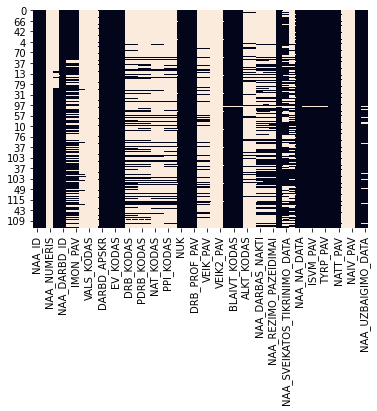

In [93]:
sns.heatmap(df.isna(), cbar=False)

In [94]:
df.isna().sum()

NAA_ID                              0
NAA_REGISTRAVIMO_DATA               0
NAA_NUMERIS                      1365
DARB_KODAS                        470
NAA_DARBD_ID                        0
IMON_KODAS                        414
IMON_PAV                          414
NAA_DARBD_PAD_DARBD_ID           1323
VALS_KODAS                       1365
VALS_PAV                         1365
DARBD_APSKR                         0
DARBD_SAV                           0
EV_KODAS                            0
EV_PAV                              0
DRB_KODAS                         980
DRB_PAV                           980
PDRB_KODAS                       1053
PDRB_PAV                         1053
NAT_KODAS                        1164
NAT_PAV                          1164
PPI_KODAS                        1113
PPI_PAV                          1113
NUK                                 0
DRB_PROF_KODAS                      1
DRB_PROF_PAV                        1
VEIK_KODAS                       1144
VEIK_PAV    

In [95]:
df.drop(['NAA_NUMERIS','NAA_DARBD_PAD_DARBD_ID','VALS_KODAS','VALS_PAV','VEIK2_KODAS','VEIK2_PAV','NAIV_KODAS','NAIV_PAV'], axis=1, inplace=True)

<AxesSubplot:>

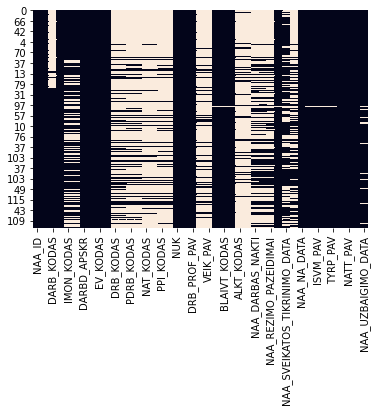

In [96]:
sns.heatmap(df.isna(), cbar=False)

Trumpas analizėje naudotų stulpelių apibūdinimas:
1. NAA_NA_DATA - nelaimingo atsitikimo/įvykio darbe data
2. NAA_UZBAIGIMO_DATA - VDI nelaimingo atsitikimo darbe tyrimo pabaigos data
3. NAA_ID - unikalus kiekvieno nelaimingo įvykio darbe registracijos numeris
4. BLAIVT_PAV - darbuotojo, nukentėjusio nelaimingo atsitikimo darbe metu, blaivumo/girtumo statusas
5. ALKT_PAV - neblaivaus/apsvaigusio darbuotojo vartotos medžiagos
6. DRB_PROF_PAV - darbuotojo profesija
7. NATT_PAV - nelaimingo atsitikimo darbe sunkumo kategorija
8. NAA_NUK_DARBO_TRUKME_VISO_MEN - nukentėjusio darbuotojo darbo stažas mėnesiais
9. NATT_KODAS - nelaimingo atsitikimo darbe sunkumo kategorijos kodas
10. ISVM_PAV - nelaimingo atsitikimo darbe aplinkybės/priežastis
11. EV_PAV - atliekamų darbų kategorija
12. DARBD_APSKR - apskritis, kurioje nustatytas nelaimingas atsitikimas darbe

### 2. Nelaimingų atsitikimų darbe chronologija

**2.1. Prielaidos:    
    1. Pastaraisias metais stebimas sumažėjęs nelaimingų atsitikimų darbe kiekis, dėl COVID-19 pandemijos įvestų karantino ir kontaktinio darbo apribojimų.                                                                                           
    2. Šaltuoju metų periodu (rugsėjo - vasario mėnesiais) įvyksta daugiau NA darbe nei pavasarį ir vasarą.               
    3. Savaitgaliais fiksuojama mažiau nelaimingų atsitikimų, nei kitomis savaitės dienomis.**
    

In [97]:
df['NAA_NA_DATA'] = pd.to_datetime(df['NAA_NA_DATA'])
df['NAA_UZBAIGIMO_DATA'] = pd.to_datetime(df['NAA_UZBAIGIMO_DATA'])

In [98]:
df['Metai'] = pd.DatetimeIndex(df['NAA_NA_DATA']).year

df['Mėnuo'] = pd.DatetimeIndex(df['NAA_NA_DATA']).month

df['Diena'] = pd.DatetimeIndex(df['NAA_NA_DATA']).day

df['Savaitės_diena'] = pd.DatetimeIndex(df['NAA_NA_DATA']).dayofweek

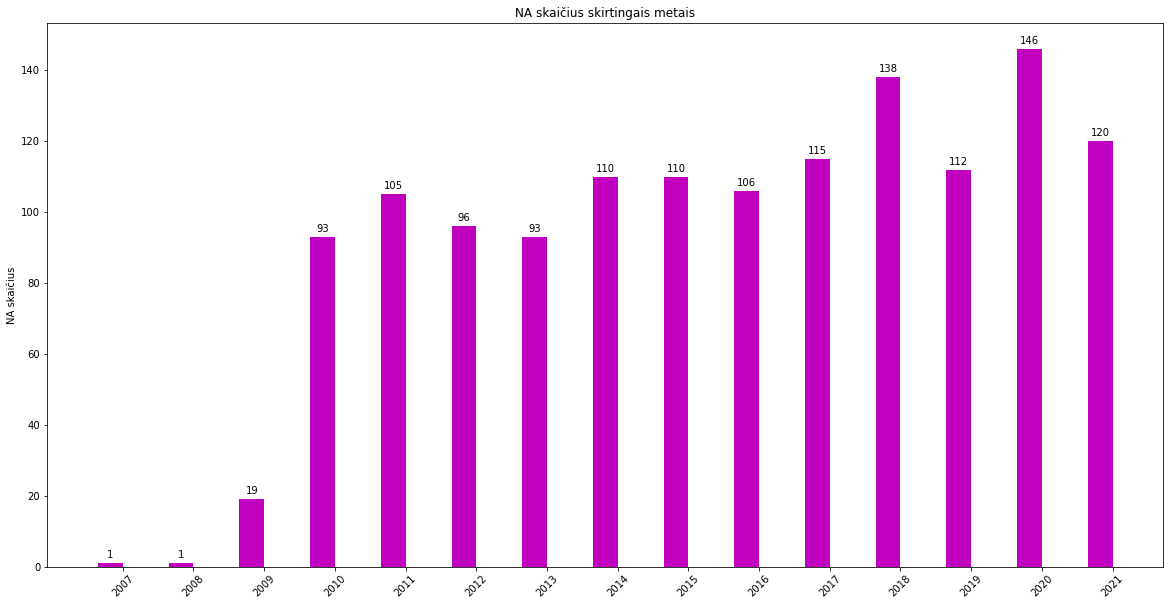

In [99]:
incidents_by_year = df.groupby('Metai')['NAA_ID'].count()
incidents_by_year_df = pd.DataFrame(incidents_by_year).reset_index()

group_by = incidents_by_year_df['Metai']
num = incidents_by_year_df['NAA_ID']

x = np.arange(len(group_by))
width = 0.35
fig, ax = plt.subplots()

ax.set_xticks(x)
ax.set_xticklabels(group_by)
plt.xticks(rotation = 45)
fig.set_figwidth(20)
fig.set_figheight(10)
plt.ylabel('NA skaičius')
plt.title('NA skaičius skirtingais metais')

pps = ax.bar(x - width/2, num, width,color = 'm')
for p in pps:
   height = p.get_height()
   ax.annotate(f'{height}',
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')

**Matoma, jog nelaimingų atsitikimų darbe atvejų skaičius metų eigoje didėja. 2020m. COVID-19 pandemijos metu nustatytas didžiausias per dešimtmetį NA darbe skaičius,dėl to pirmoji prielaida klaidinga.**

In [126]:
df['tyrimo trukmė'] = (df['NAA_UZBAIGIMO_DATA'] - df['NAA_NA_DATA'])/ np.timedelta64(1,'M')
print(f"Tyrimo trukmės vidurkis: {df['tyrimo trukmė'].mean()}")

Tyrimo trukmės vidurkis: 3.101620258910084


In [129]:
atvejis = df.loc[df['Metai']==2007]
print('Tyrimo trukmė (2007 metų atvejis):')
atvejis['tyrimo trukmė']

Tyrimo trukmė (2007 metų atvejis):


53    33.577692
Name: tyrimo trukmė, dtype: float64

**Valstybinės darbo inspekcijos pateiktų duomenų periodas prasideda tik 2010 metais, tačiau grafike matomi ir incidentai, įvykę 2007, 2008 bei 2009 metais. Nesutapimo priežastis - nelaimingi įvykiai registruojami duombazėje tik užbaigus VDI atliekamą tyrimą. Vidutiniškai nelaimingo atsitikimo darbe tyrimas trunka 3 mėn, o štai vienintelio grafike matomo 2017 m. atvejo tyrimas užtruko net 33 mėnesius.**

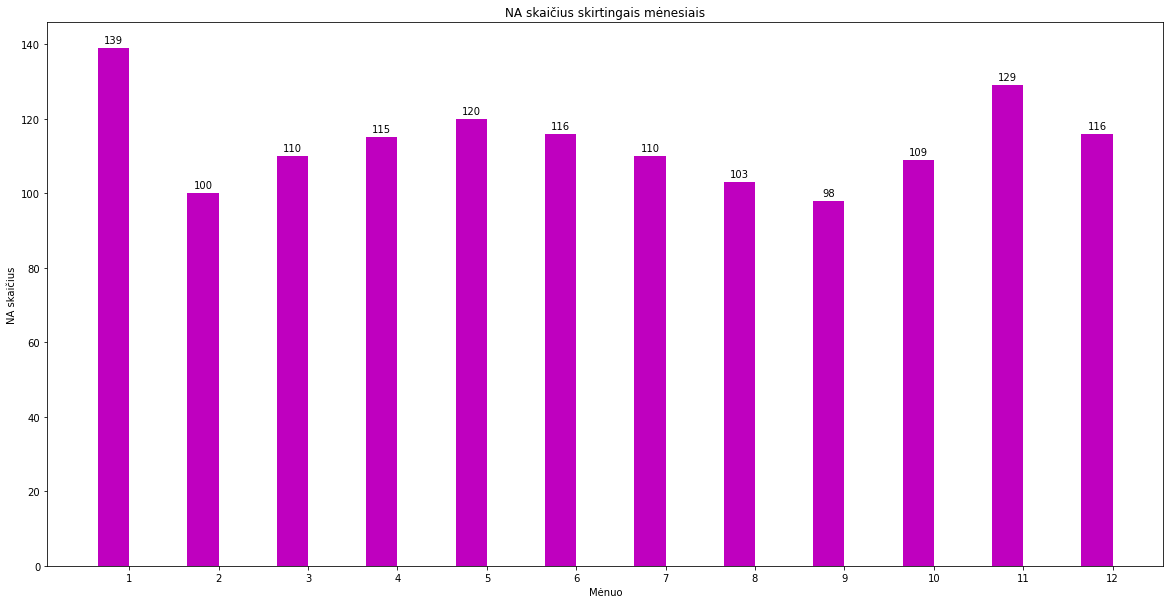

In [102]:
incidents_by_month = df.groupby('Mėnuo')['NAA_ID'].count()
incidents_by_month_df = pd.DataFrame(incidents_by_month).reset_index()

group_by = incidents_by_month_df['Mėnuo']
num = incidents_by_month_df['NAA_ID']

x = np.arange(len(group_by))
width = 0.35
fig, ax = plt.subplots()

ax.set_xticks(x)
ax.set_xticklabels(group_by)
fig.set_figwidth(20)
fig.set_figheight(10)
plt.ylabel('NA skaičius')
plt.xlabel('Mėnuo')
plt.title('NA skaičius skirtingais mėnesiais')
pps = ax.bar(x - width/2, num, width, color = 'm')
for p in pps:
   height = p.get_height()
   ax.annotate(f'{height}',
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')


In [130]:
saltasis_sezonas = df.loc[df['Mėnuo'].isin([9,10,11,12,1,2])]
print(f"Atvejų skaičius šaltuoju sezonu: {saltasis_sezonas['NAA_ID'].count()}")

Atvejų skaičius šaltuoju sezonu: 691


In [131]:
siltasis_sezonas = df.loc[df['Mėnuo'].isin([3,4,5,6,7,8])]
print(f"Atvejų skaičius šiltuoju sezonu: {siltasis_sezonas['NAA_ID'].count()}")

Atvejų skaičius šiltuoju sezonu: 674


**Mažiausias nelaimingų atsitikimų darbe atvejų skaičius fiksuojamas vasario ir rugsėjo mėnesiais, tuo tarpu sausio ir lapkričio mėnesiais darbe susižeidžiama daugiausiai. Bendros atvejų sumos šiltuoju ir šaltuoju metų periodu skiriasi nežymiai, dėl to galima teigti, jog antroji prielaida neteisinga.**

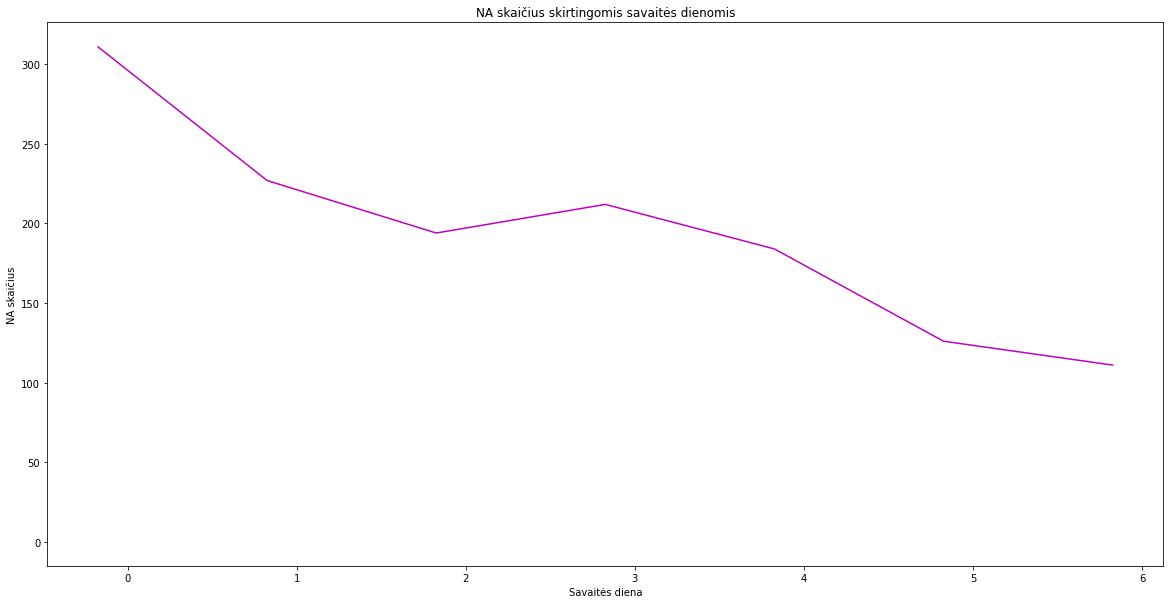

In [105]:
incidents_by_dayofweek = df.groupby('Savaitės_diena')['NAA_ID'].count()
incidents_by_dayofweek_df = pd.DataFrame(incidents_by_dayofweek).reset_index()

group_by = incidents_by_dayofweek_df['Savaitės_diena']
num = incidents_by_dayofweek_df['NAA_ID']

x = np.arange(len(group_by))
width = 0.35
fig, ax = plt.subplots()

ax.set_xticks(x)
ax.set_xticklabels(group_by)
fig.set_figwidth(20)
fig.set_figheight(10)
plt.ylabel('NA skaičius')
plt.xlabel('Savaitės diena')
plt.title('NA skaičius skirtingomis savaitės dienomis')

pps = ax.plot(x - width/2, num, width, color = 'm')

In [106]:
penktadienis13 = df.loc[(df['Savaitės_diena']==4) & (df['Diena']==13)] 
penktadienis13

,NAA_ID,NAA_REGISTRAVIMO_DATA,DARB_KODAS,NAA_DARBD_ID,IMON_KODAS,IMON_PAV,DARBD_APSKR,DARBD_SAV,EV_KODAS,EV_PAV,...,TYRP_PAV,NATT_KODAS,NATT_PAV,TYR_INSP_KODAS,NAA_UZBAIGIMO_DATA,Metai,Mėnuo,Diena,Savaitės_diena,tyrimo trukmė
38,69145,2015-03-03,706.0,244619,NaN,NaN,Klaipėdos apskr.,Klaipėdos m. sav.,494100,Krovininis kelių transportas,...,buvo remtasi gydytojo išvadomis,3,mirtina,706.0,NaT,2015,2,13,4,NaN
75,74982,2016-01-12,804.0,16218,NaN,NaN,Vilniaus apskr.,Vilniaus m. sav.,494100,Krovininis kelių transportas,...,buvo remtasi gydytojo išvadomis,3,mirtina,804.0,2016-01-12,2015,11,13,4,1.971293
19,105128,2020-03-04,607.0,429735506,NaN,NaN,Klaipėdos apskr.,Klaipėdos r. sav.,383200,Išrūšiuotų medžiagų atgavimas,...,buvo remtasi kita tyrimo medžiaga,3,mirtina,607.0,2020-03-17,2019,9,13,4,6.111008


In [132]:
na_dažnis = len(df)/len(df['NAA_NA_DATA'].unique())
print(f"Nelaimingų atsitikimų darbe dažnis: {na_dažnis}")

Nelaimingų atsitikimų darbe dažnis: 1.1859252823631625


**Nelaimingų atsitikimų darbe kiekis savaitės eigoje mažėja ir mažiausias fiksuojamas sekmadienį. Šią tendenciją galima sieti su tuo, jog savaitgalį dirba tik dalis visų įmonių ir tuo pačiu mažėja darbuotojų, esančių savo darbo vietoje. Penktadienį - 13 mėnesio dieną per dešimtmetį užfiksuoti trys nelaimingi atsitikimai, tačiau didesnio atsitikimų dažnio nei įprastai penktadienį-13 nenustatyta**

### 3. Nelaimingi atsitikimai darbe ir darbuotojų blaivumas

**3.1. Prielaidos:                                                                                                         
    1. Neblaivūs darbuotojai dažniau patiria mirtiną traumą darbe.**

Text(0.5, 1.0, 'Pasiskirtymas pagal blaivumo statusą')

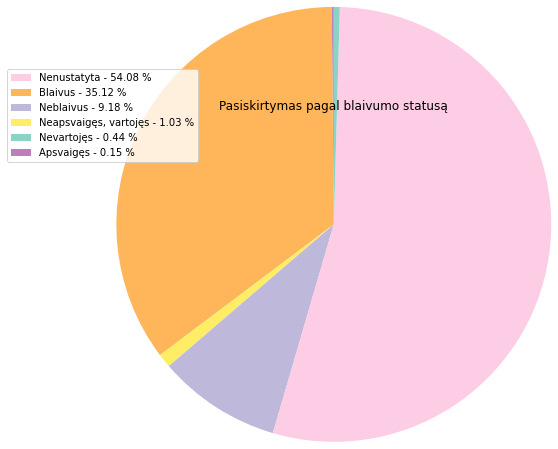

In [108]:
blaivumas = df.groupby('BLAIVT_PAV')['NAA_ID'].count()
blaivumas_df = pd.DataFrame(blaivumas).reset_index() 
x=blaivumas_df['BLAIVT_PAV']
y=blaivumas_df['NAA_ID']
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors= ["#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"], startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),fontsize=10)
plt.title('Pasiskirtymas pagal blaivumo statusą')
#https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart

In [109]:
medziagos = df['ALKT_PAV'].value_counts()
medziagos

etilo alkoholis                                                   108
medžiagų nerasta                                                   80
nenustatyta cheminė medžiaga ar nenustatytas cheminis junginys      5
narkotinės medžiagos                                                3
metilo alkoholis                                                    2
cheminė medžiaga (nustatyta)                                        1
Name: ALKT_PAV, dtype: int64

In [110]:
alkoholis = df.loc[df['ALKT_PAV']=='etilo alkoholis', 'DRB_PROF_PAV'].to_frame()
profesijos = alkoholis.groupby('DRB_PROF_PAV')['DRB_PROF_PAV'].count()
profesijos.sort_values(ascending=False).head(5)

DRB_PROF_PAV
Vairuotojas ekspeditorius                                        14
Tarptautinio krovinių vežimo transporto priemonės vairuotojas    13
Sunkiasvorių sunkvežimių ir krovininių mašinų vairuotojai        11
Pagalbinis darbininkas                                            5
Garo variklių ir katilų operatoriai                               4
Name: DRB_PROF_PAV, dtype: int64

Text(0.5, 1.0, 'Traumų pasiskirstymas pagal sunkumą')

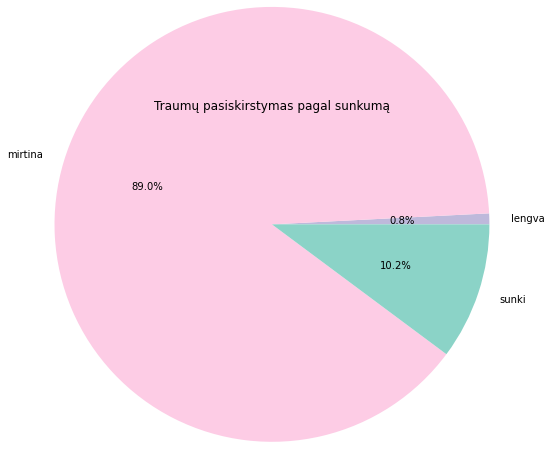

In [111]:
df.groupby('NATT_PAV')['NAA_ID'].count().plot(kind='pie', autopct='%1.1f%%', colors = ["#beb9db", "#fdcce5", "#8bd3c7"], radius=2.5)
plt.ylabel(' ')
plt.title('Traumų pasiskirstymas pagal sunkumą')

In [112]:
incidents_by_sobriety = df.groupby(['NATT_PAV','BLAIVT_PAV'])['NAA_ID'].count().unstack().fillna(0)
incidents_by_sobriety

BLAIVT_PAV,Apsvaigęs,Blaivus,"Neapsvaigęs, vartojęs",Neblaivus,Nenustatyta,Nevartojęs
NATT_PAV,,,,,,
lengva,0.0,1.0,0.0,0.0,9.0,0.0
mirtina,2.0,452.0,14.0,101.0,638.0,6.0
sunki,0.0,25.0,0.0,24.0,89.0,0.0


In [113]:
def procentine_israiska(x):
    return x*100/sum(x)

Text(0, 0.5, '%')

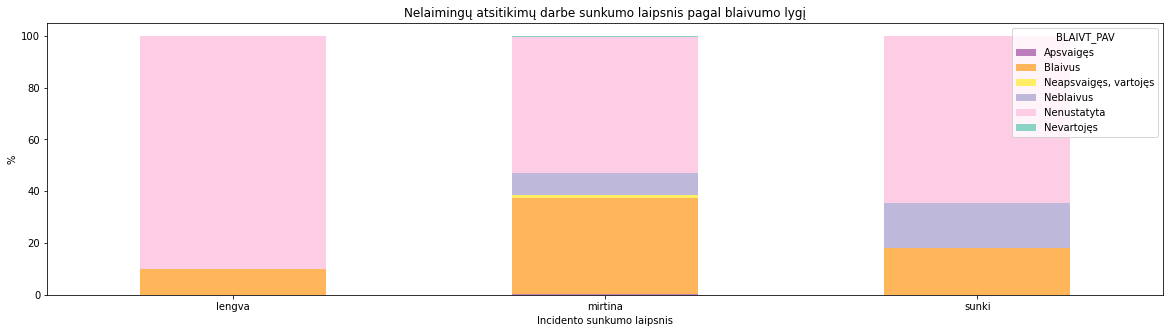

In [114]:
stacked_data = incidents_by_sobriety.apply(procentine_israiska, axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,5), color = ["#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"], rot=0)
plt.title("Nelaimingų atsitikimų darbe sunkumo laipsnis pagal blaivumo lygį")
plt.xlabel("Incidento sunkumo laipsnis")
plt.ylabel("%")

**Didžiosios dalies NA metu nukentėjusių darbuotojų blaivumo statusas nenustatytas, tai gali būti siejama su kitomis įvykių aplinkybėmis. Apie 10% nukentėjųsių darbuotojų incidento metu buvo neblaivūs arba vartoję kitų medžiagų, dažniausiai nustatyta medžiaga - etilo alkoholis. Akivaizdaus ryšio tarp blaivumo statuso ir traumos sunkumo nenustatyta, tiek mirtiną tiek sunkią traumą patiria ir blaivūs ir neblaivūs darbuotojai. Mirtinos traumos atveju - blaivių darbuotojų dalis netgi didesnė nei neblaivių, tačiau šią tendenciją paaiškina kitos nelaimingų atsitikimų darbe aplinkybės, nagrinėjamos 4 skyriuje. Profesijos, kurių atstovai dažniausiai piktnaužiauja alkoholiu - įvairių kategorijų vairuotojai.**

### 4. Nelaimingi atsitikimai darbe ir darbuotojų patirtis

**4.1. Prielaidos:                                                                                                         
    1. Patyrę darbuotojai rečiau patiria mirtiną nelaimingą atsitikimą darbe.**

In [133]:
print(f"Vidutinis darbutojų stažas: {df['NAA_NUK_DARBO_TRUKME_VISO_MEN'].mean()}")

Vidutinis darbutojų stažas: 60.428256070640174


Text(0.5, 0, 'NA skaičius')

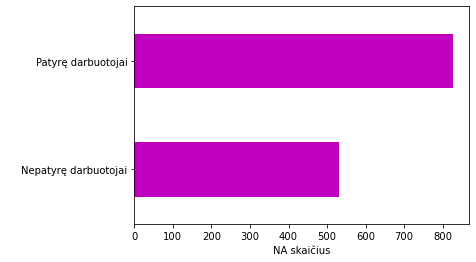

In [116]:
df.loc[df['NAA_NUK_DARBO_TRUKME_VISO_MEN'] <= 12, 'Patirtis'] = 'Nepatyrę darbuotojai' 
df.loc[df['NAA_NUK_DARBO_TRUKME_VISO_MEN'] > 12, 'Patirtis'] = 'Patyrę darbuotojai'
p = df.groupby('Patirtis')['NAA_ID'].count()
p.plot(kind = 'barh', color='m')
plt.ylabel(' ')
plt.xlabel('NA skaičius')

In [117]:
df.loc[df['NATT_KODAS'] == 3, 'mirtinas_incidentas'] = '1' 
df.loc[df['NATT_KODAS'] < 3, 'mirtinas_incidentas'] = '0' 

In [134]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(df['Patirtis'], df['mirtinas_incidentas'])
koeficientas = cramers_v(confusion_matrix.values)
print(f"Koeficientas: {koeficientas}")

#https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

Koeficientas: 0.06507074171541338


**Vidutinis nukentėjusių darbuotojų darbo stažas - 5 metai. Ryšiui tarp kategorinių kintamųjų nustatyti pasitelktas Kramerio metodas (funkcija iš 'Stackoverflow'), tačiau ryšio tarp darbuotojų patirties ir mirtino/nemirtino įvykio nenustatyta.**

### 5. Nelaimingų atsitikimų darbe rūšys

**5.1. Prielaidos:                                                                                                         
    1.Dažniausiai nelaimingi atsitikimai darbe susiję su įvairios rūšies traumomis**

In [119]:
df['ISVM_PAV'] = df['ISVM_PAV'].replace([
    'darbuotojas mirė/nukentėjo dėl širdies ligos',
    'darbuotojas mirė/nukentėjo dėl kitos ligos',
    'kita',
    'darbuotojas mirė/nukentėjo dėl galvos smegenų ligos',
    'nukentėjusysis siekė susižaloti ar nusižudyti',
    'darbuotojas nukentėjo dėl smurto, kurio aplinkybės ir motyvai nesusiję su darbu',
    'nukentėjusysis savavališkai, be darbdaviui atstovaujančio asmens ar padalinio vadovo rašytinio leidimo, dirbo sau (savo interesais)',
    'darbuotojas dirbo be darbo sutarties - nesant darbo teisinių santykių',
    'apsinuodijo, vartojant alkoholį ar kitą narkotinę medžiagą',
    'buvo nukentėjusiojo nusikalstama veika'],
    ['Širdies ligos', 
     'Kitos ligos',
     'Kita',
     'Galvos smegenų liga',
     'Siekė susižaloti/nusižudyti',
     'Smurtas nesusijęs su darbu',
     'Savavališkai dirbo savo interesais',
     'Dirbo be darbo sutarties',
     'Apsinuodijimas alkoholiu/narkotinėmis medžiagomis',
     'Nukentėjusio nusikalstama veikla'])

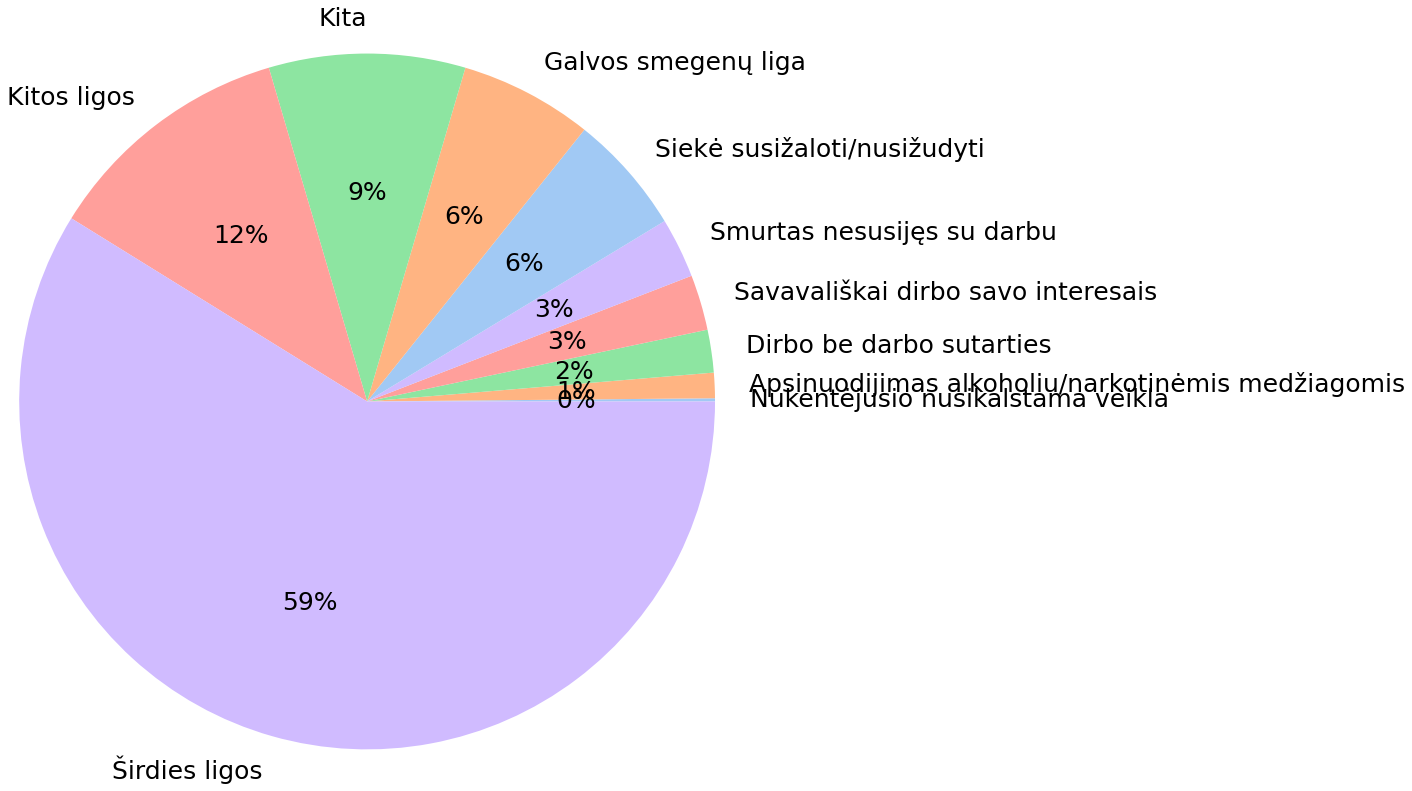

In [120]:
incident_groups = df.groupby('ISVM_PAV')['NAA_ID'].count().sort_values().reset_index(name='NA_skaičius')
labels=[df['ISVM_PAV'].unique()]

colors = sns.color_palette('pastel')[0:5]
pie = plt.pie(incident_groups['NA_skaičius'], labels = incident_groups['ISVM_PAV'], colors = colors, autopct='%.0f%%', radius = 4.0, textprops={'fontsize': 25})

**Daugiau nei pusė visų nelaimingų atsitikimų darbe sąlygoti širdies ligų, taip pat nemažą dalį sudaro ir galvos smegenų bei kitos ligos. Tai galėtų paaiškinti, kodėl nenustatytas ryšys tarp incidentų sunkumo ir darbuotojų blaivumo statuso bei darbuotojų patirties. Prielaida neteisinga.**

### 6. Nelaimingų atsitikimų darbe TOP apskritys

**6.1.Prielaidos:                                                                                                         
    1.Didžiuosiuose Lietuvos miestuose (Vilniuje, Kaune, Klaipėdoje, Šiauliuose, Panevėžyje) fiksuojamas didžiausias nelaimingų atsitikimų darbe skaičius.**

Text(0.5, 0, ' ')

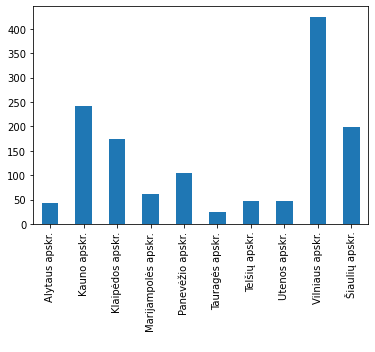

In [121]:
ivykiai_apskrityse = df.groupby('DARBD_APSKR')['NAA_ID'].count()
ivykiai_apskrityse.plot(kind = 'bar', rot=90)
plt.xlabel(' ')

In [122]:
apskritys_2_lygis = df.groupby(['DARBD_APSKR','EV_PAV'])['NAA_ID'].count().reset_index()

apskritys_1_lygis = apskritys_2_lygis.groupby(['DARBD_APSKR'])

apskritis_veikla_ir_skaičius = apskritys_1_lygis.apply(lambda x: x.sort_values('NAA_ID', ascending=False))
apskritis_veikla_ir_skaičius

DARBD_APSKR  \
DARBD_APSKR                          
Alytaus apskr. 5    Alytaus apskr.   
               3    Alytaus apskr.   
               21   Alytaus apskr.   
               23   Alytaus apskr.   
               2    Alytaus apskr.   
...                            ...   
Šiaulių apskr. 520  Šiaulių apskr.   
               522  Šiaulių apskr.   
               524  Šiaulių apskr.   
               493  Šiaulių apskr.   
               525  Šiaulių apskr.   

                                                               EV_PAV  NAA_ID  
DARBD_APSKR                                                                    
Alytaus apskr. 5                         Krovininis kelių transportas       9  
               3                    Kelių ir automagistralių tiesimas       5  
               21                                       Valymo veikla       3  
               23                                   Vidurinis ugdymas       2  
               2           Gyvenamųjų ir negyvenamųjų pastatų statyba       2  
...                                                               ...     ...  
Šiaulių apskr. 520  Krovininis kelių transportas ir perkraustymo v...       1  
               522                       Lengvųjų metalų taros gamyba       1  
               524              Lietuvos Respublikos seniūnijų veikla       1  
               493  Automobilių ir lengvųjų variklinių transporto ...       1  
               525                                   Ligoninių veikla       1  

[559 rows x 3 columns]

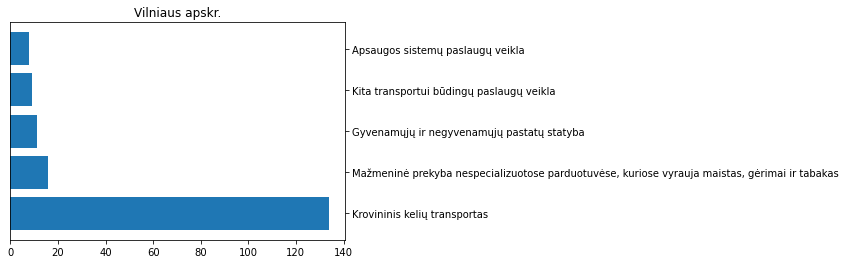

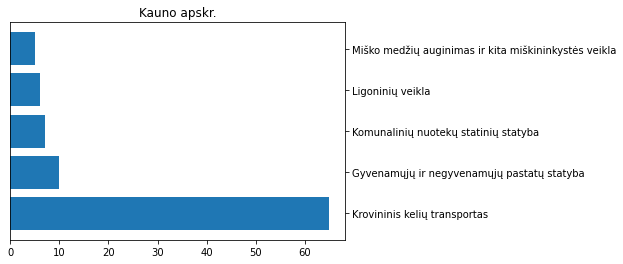

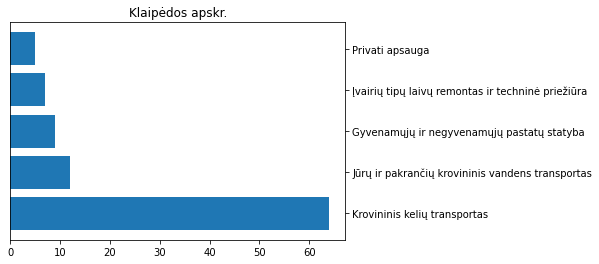

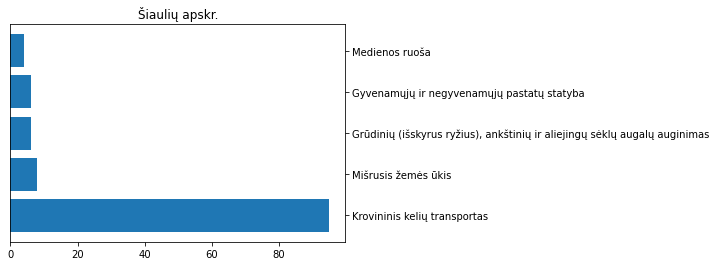

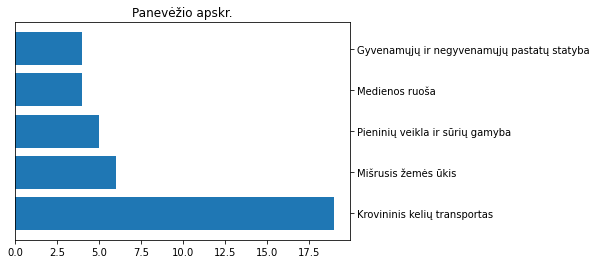

In [123]:
apskritys = ['Vilniaus apskr.', 'Kauno apskr.', 'Klaipėdos apskr.', 'Šiaulių apskr.', 'Panevėžio apskr.']

for apskritis in apskritys:
    veikla_ir_skaičius = darbo_sritys.loc[darbo_sritys['DARBD_APSKR']== apskritis].head(5)
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    xpoints = veikla_ir_skaičius['EV_PAV']
    ypoints = veikla_ir_skaičius['NAA_ID']
    ax.barh(xpoints, ypoints)
    ax.set_title(apskritis)

In [124]:
df['IMON_PAV'].value_counts()

Privati įmonė (išskyrus ūkius ir ūkininkus)                755
Valstybės ar savivaldybės įmonė arba biudžetinė įstaiga    159
Ūkis, gaminantis produkciją rinkai                          15
Ūkininkai                                                   13
Užsienio įmonė (filialas)                                    5
Fiziniai asmenys                                             4
Name: IMON_PAV, dtype: int64

**TOP5 apskritys, kurios fiksuojamas didžiausias NA darbe kiekis - Vilniaus, Kauno, Klaipėdos, Šiaulių, Panevėžio  apskritys. Prielaida teisinga.Darbo sritis, kuri visose apskrityse susijusi su didžiausiu NA atvejų skaičiumi - krovininis kelių transportas. Didžioji dalis NA darbe fiksuojami privačiose įmonėse.**  